# MoE Trace Analysis

This notebook summarizes the MoE trace data and generates analysis plots using the existing scripts in `sim/`.


## Setup
Define paths and helper to run scripts and show outputs.

In [ ]:

from pathlib import Path
import subprocess
import sys

# Change this to the dataset you want to analyze
DATASET = 'Idavidrein_gpqa'

REPO = Path('.').resolve()
TRACE = REPO / 'data' / DATASET / 'processed' / 'trace_no_origin_rows.jsonl'
OUT_DIR = REPO / 'data' / DATASET / 'processed'
OUT_DIR.mkdir(parents=True, exist_ok=True)

PY = REPO / '.venv' / 'bin' / 'python'

def run(cmd):
    print(' '.join(str(c) for c in cmd))
    p = subprocess.run(cmd, capture_output=True, text=True)
    if p.stdout:
        print(p.stdout)
    if p.stderr:
        print(p.stderr)
    p.check_returncode()


## High-Level Summary and per-layer Frequency Histogram
Histogram of expert frequency bins per layer.

/Users/jrock/repos/moe-balancing/.venv/bin/python sim/analyze_trace.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --layers 3-60 --hist-out /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/expert_freq_hist_layers_3-60.png
trace summary
  records: 10324
  samples (unique request_id): 178
sequence length distribution
  min: 103  p50: 3529  p90: 16063  p99: 26115  max: 26592
max expert frequency per layer (%)
  min: 1.2518  p50: 2.3603  p90: 4.2984  p99: 4.6093  max: 5.1930
per-layer expert frequency histogram (% of activations)
  layer 3: [0.00, 0.52)
CF [0.01, 1.33)=193 [0.52, 1.04)
CF [1.33, 2.66)=53 [1.04, 1.56)
CF [2.66, 3.99)=5 [1.56, 2.08)
CF [3.99, 5.32)=2 [2.08, 2.60)
CF [5.32, 6.65)=3 [2.60, 3.12)
CF [6.65, 7.98)=0 [3.12, 3.64)
CF [7.98, 9.31)=0 [3.64, 4.15)
CF [9.31, 10.64)=0 [4.15, 4.67)
CF [10.64, 11.97)=0 [4.67, 5.19)
CF [11.97, 13.29)=0
  layer 4: [0.00, 0.52)
CF [0.01, 1.33)=213 [0.52, 1.04)
CF [1.33, 2.

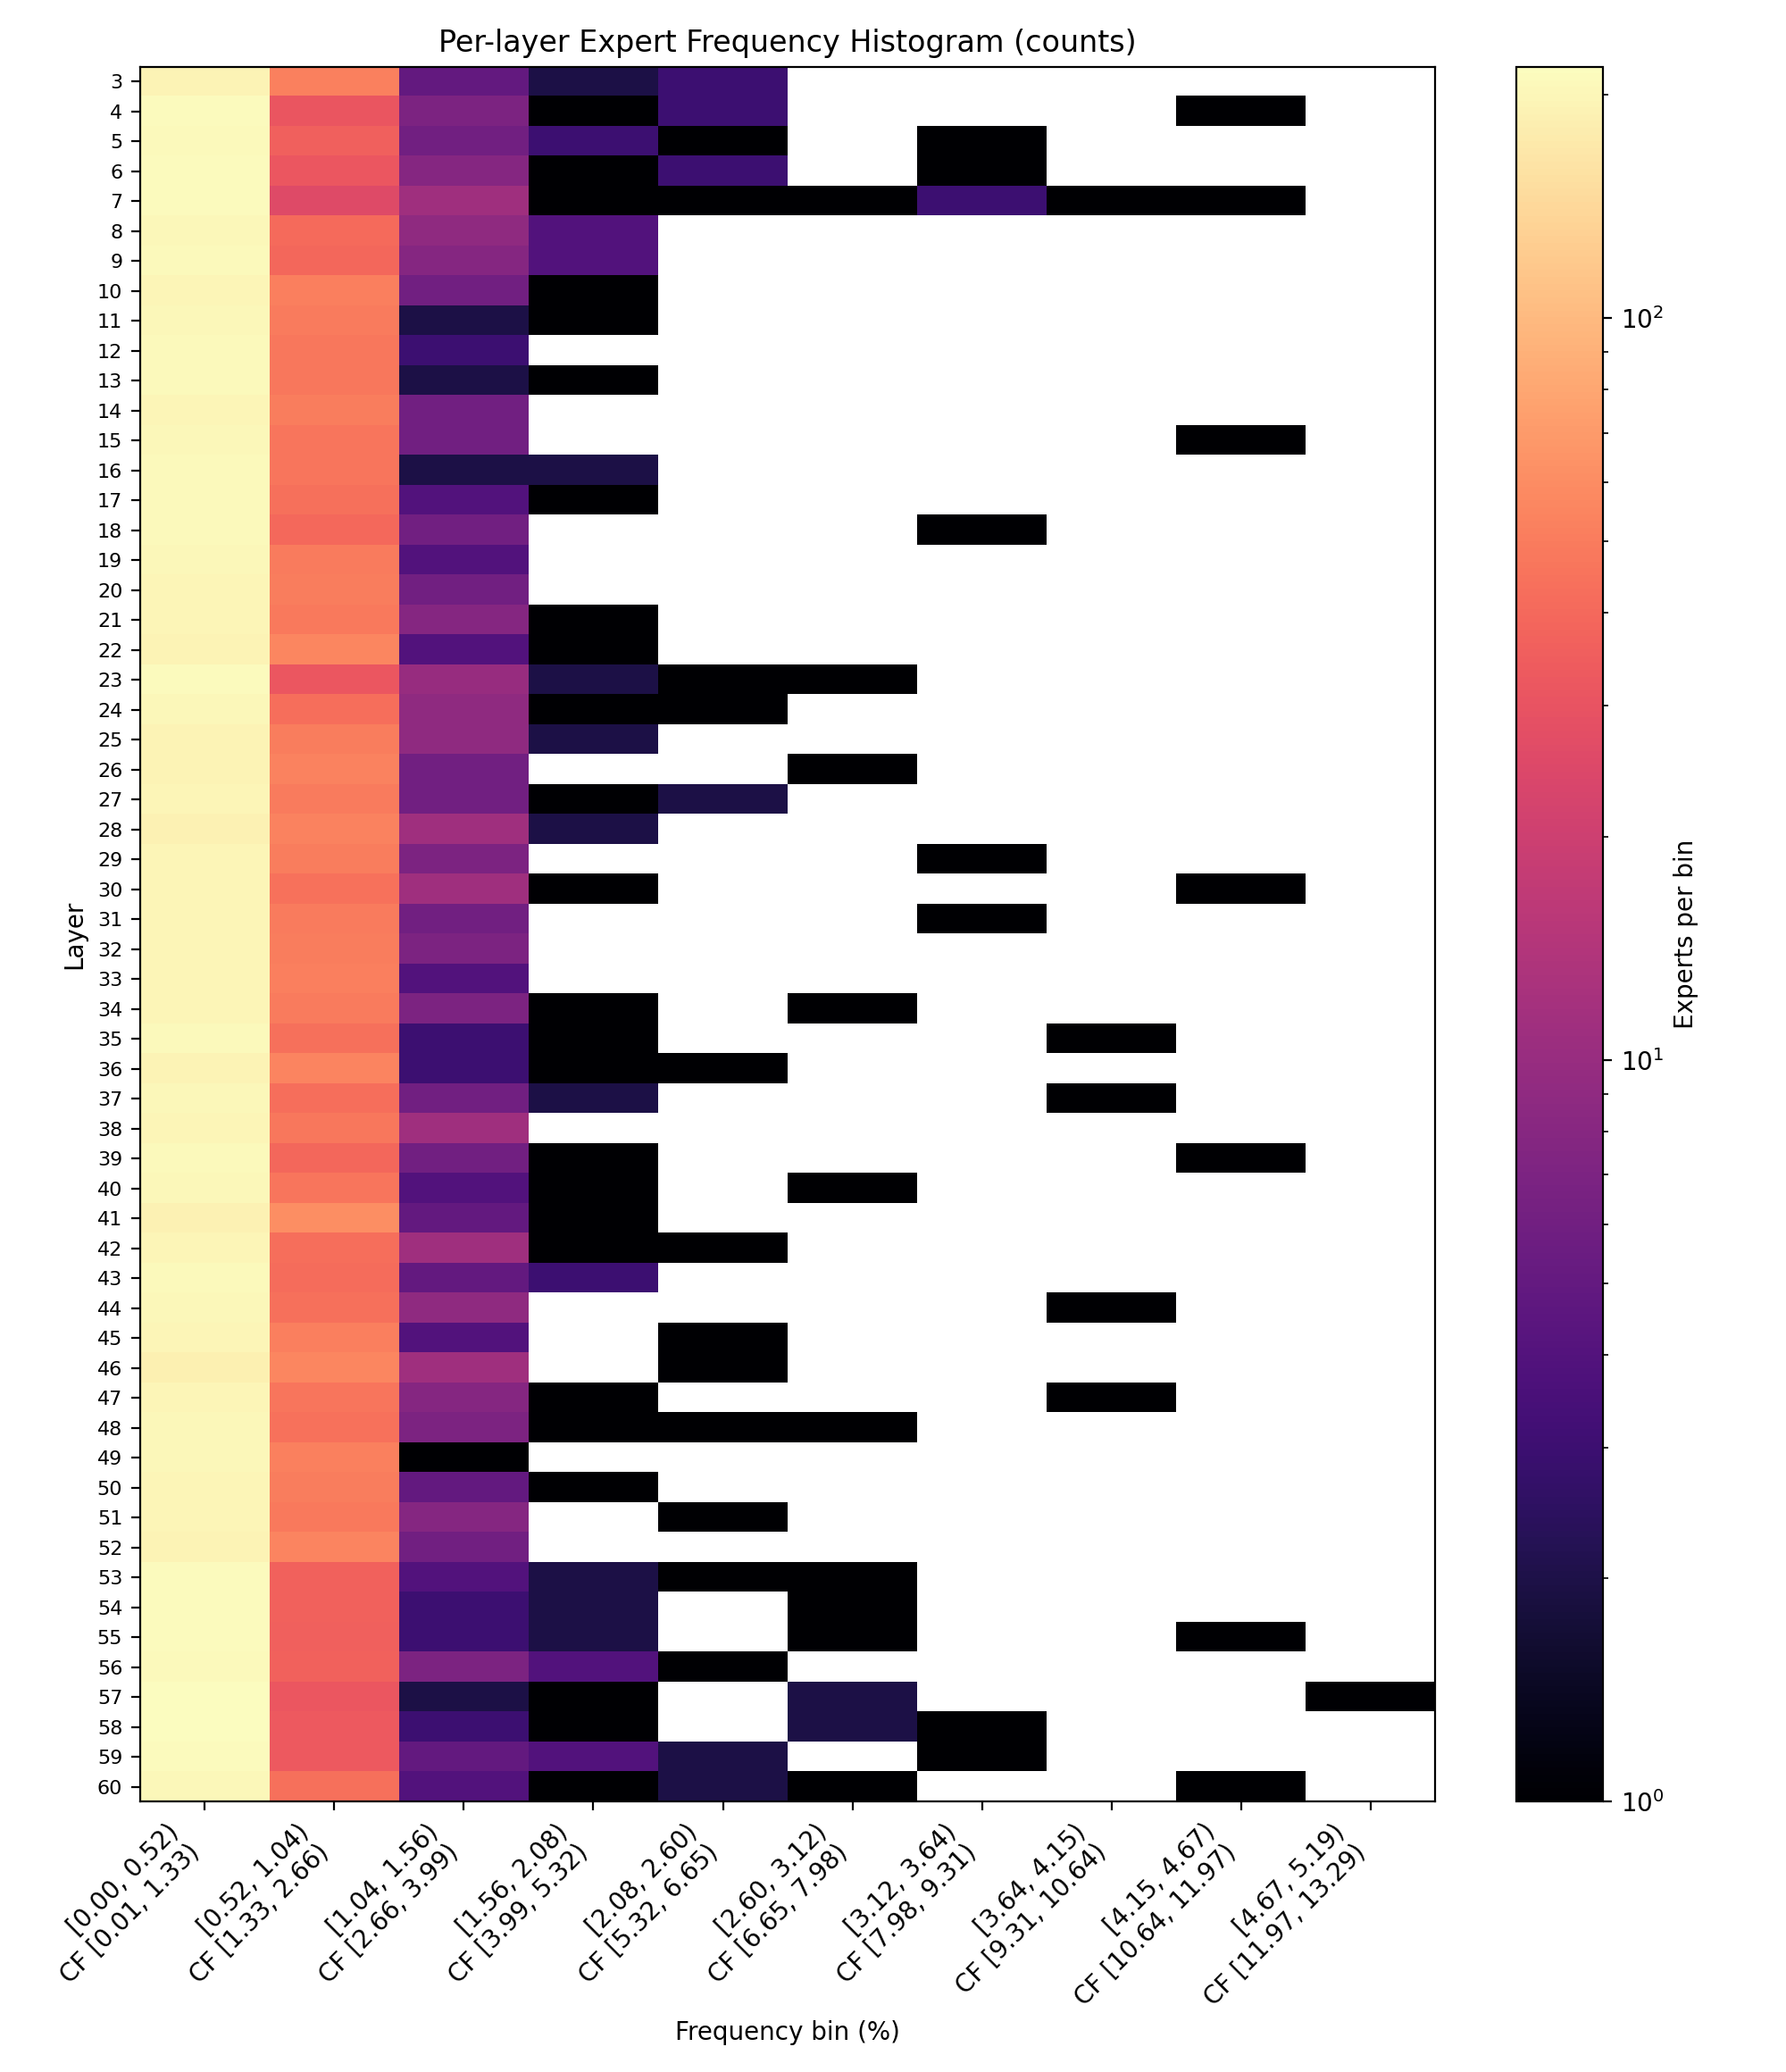

In [18]:

from IPython.display import Image, display

hist_png = OUT_DIR / 'expert_freq_hist_layers_3-60.png'
run([
    str(PY), 'sim/analyze_trace.py',
    '--trace', str(TRACE),
    '--layers', '3-60',
    '--hist-out', str(hist_png)
])
print(hist_png)

display(Image(filename=str(hist_png)))


## Expert Frequency Heatmap (All Tokens)
Frequency (%) of expert activations per layer.

In [8]:

out_png = OUT_DIR / 'expert_freq_layers_3-60_all.png'
run([
    str(PY), 'plots/plot_expert_freq.py',
    '--trace', str(TRACE),
    '--out', str(out_png),
    '--layers', '3-60'
])
print(out_png)


/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --out /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/expert_freq_layers_3-60_all.png --layers 3-60
max frequency per layer (%):
  layer 3: 2.1785%
  layer 4: 4.2090%
  layer 5: 3.1461%
  layer 6: 3.1611%
  layer 7: 4.5740%
  layer 8: 2.0131%
  layer 9: 1.9626%
  layer 10: 2.0438%
  layer 11: 1.9463%
  layer 12: 1.2518%
  layer 13: 1.9730%
  layer 14: 1.3962%
  layer 15: 4.2984%
  layer 16: 1.9325%
  layer 17: 1.5839%
  layer 18: 3.1665%
  layer 19: 1.5227%
  layer 20: 1.3353%
  layer 21: 1.8509%
  layer 22: 1.6383%
  layer 23: 3.0915%
  layer 24: 2.1945%
  layer 25: 1.8873%
  layer 26: 2.9776%
  layer 27: 2.4120%
  layer 28: 1.7566%
  layer 29: 3.3593%
  layer 30: 4.6093%
  layer 31: 3.1531%
  layer 32: 1.4897%
  layer 33: 1.5385%
  layer 34: 2.9452%
  layer 35: 3.6872%
  layer 36: 2.3603%
  layer

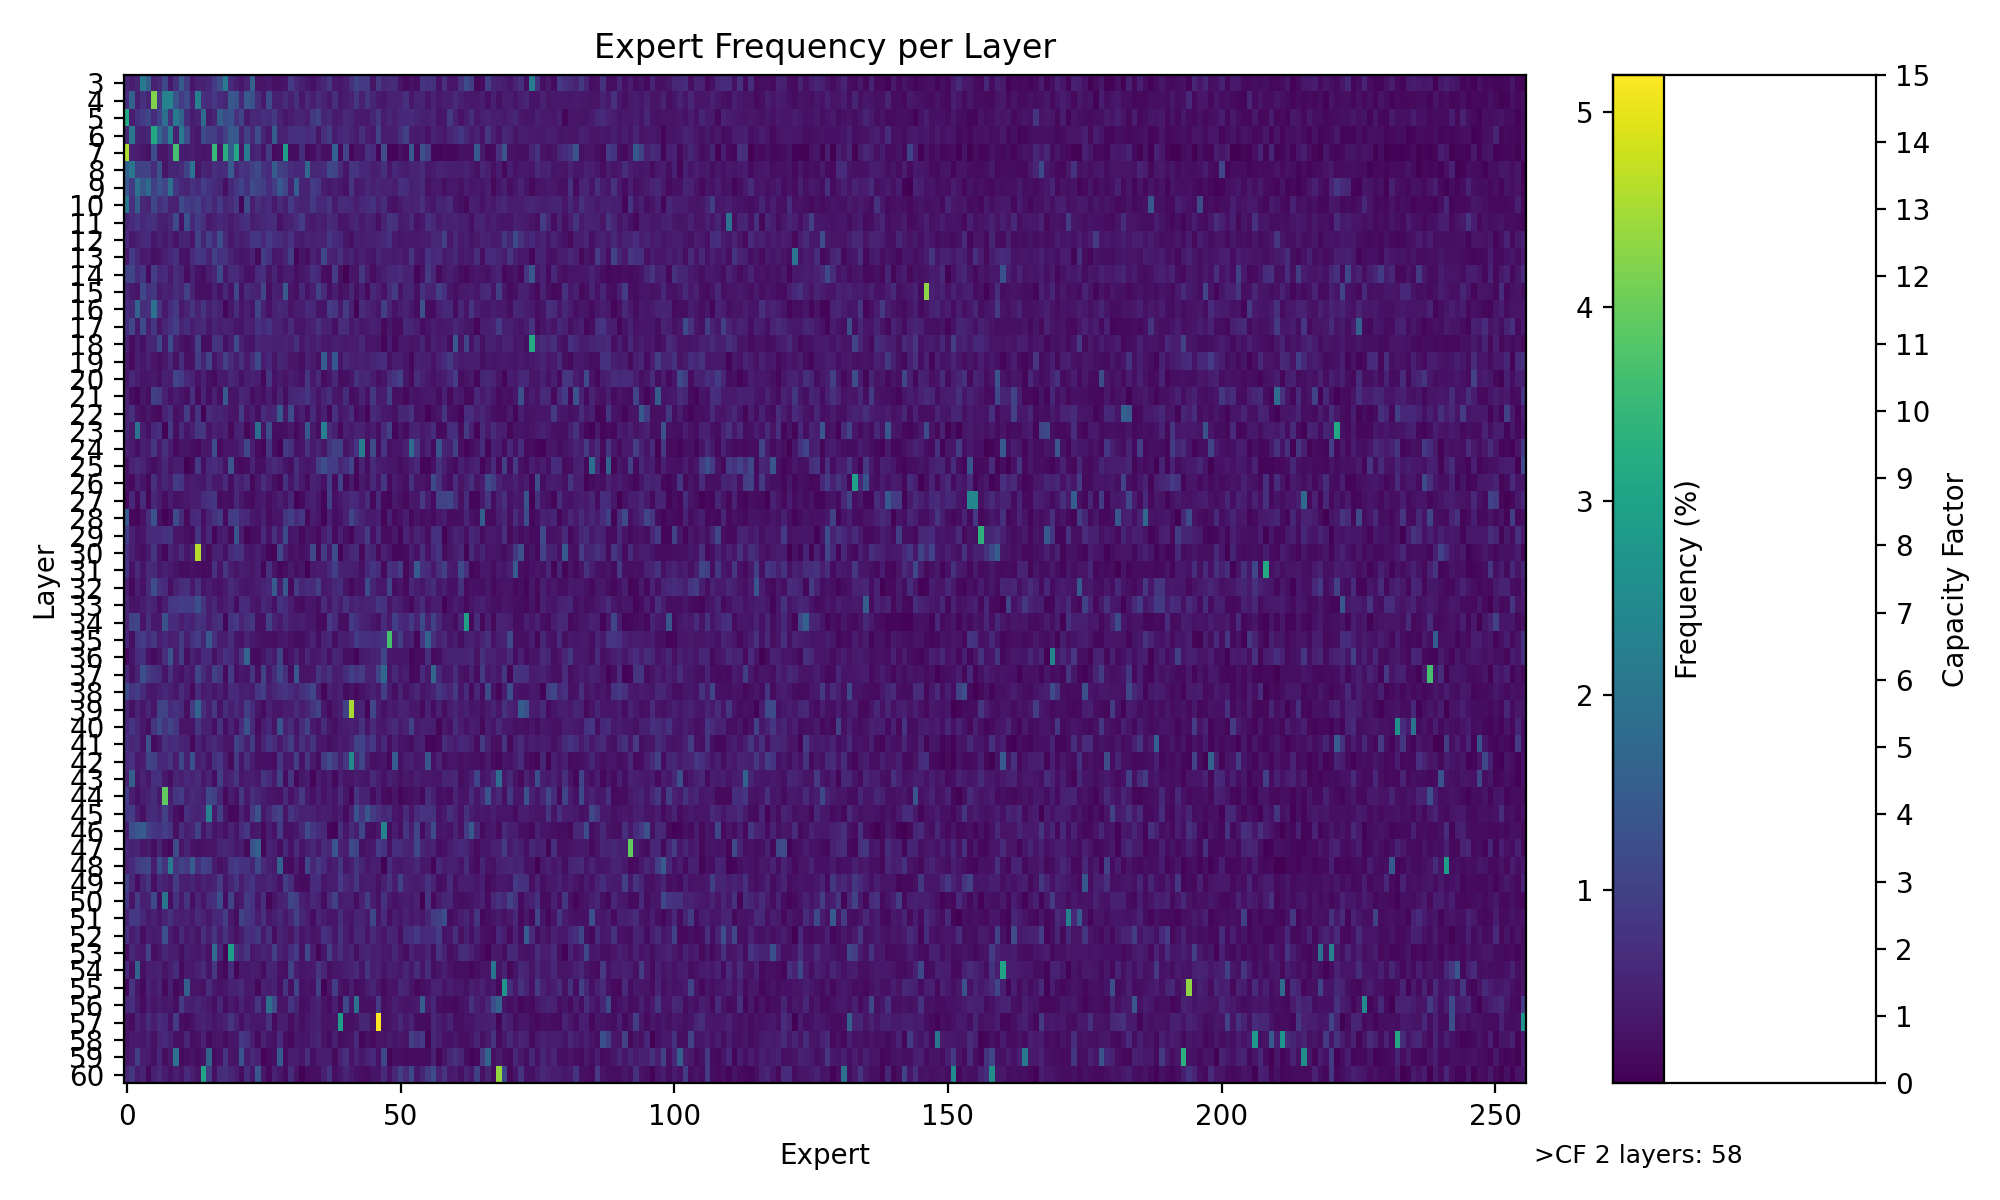

In [9]:

from IPython.display import Image, display

display(Image(filename=str(out_png)))


## Expert Frequency Heatmap (Position Range 0-127)
Restrict to positions 0-127 across all requests.

In [ ]:
from IPython.display import Image, display

out_png_pos = OUT_DIR / 'expert_freq_layers_3-60_pos_0-127.png'
run([
    str(PY), 'plots/plot_expert_freq.py',
    '--trace', str(TRACE),
    '--out', str(out_png_pos),
    '--layers', '3-60',
    '--position-ids', '0-127'
])
print(out_png_pos)
display(Image(filename=str(out_png_pos)))


/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --out /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/expert_freq_layers_3-60_pos_0-127.png --layers 3-60 --position-ids 0-127
max frequency per layer (%):
  layer 3: 1.3762%
  layer 4: 4.9403%
  layer 5: 3.0840%
  layer 6: 2.7387%
  layer 7: 4.2717%
  layer 8: 5.9762%
  layer 9: 2.8641%
  layer 10: 3.5904%
  layer 11: 3.2853%
  layer 12: 1.6803%
  layer 13: 2.1779%
  layer 14: 9.2224%
  layer 15: 4.6467%
  layer 16: 6.2731%
  layer 17: 5.9696%
  layer 18: 3.1577%
  layer 19: 3.7724%
  layer 20: 4.6423%
  layer 21: 3.5019%
  layer 22: 2.2835%
  layer 23: 4.4966%
  layer 24: 6.9587%
  layer 25: 8.0991%
  layer 26: 4.2491%
  layer 27: 3.7686%
  layer 28: 6.1175%
  layer 29: 4.2838%
  layer 30: 6.9318%
  layer 31: 5.3835%
  layer 32: 6.4633%
  layer 33: 3.8148%
  layer 34: 6.4226%
  layer 35: 5.0525%


## Expert Frequency Heatmap (Single Problem ID)
Restrict to a single request/problem id for detailed inspection.

/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --out /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/expert_freq_layers_3-60_request_0.png --layers 3-60 --request-id 0
max frequency per layer (%):
  layer 3: 2.3267%
  layer 4: 3.8698%
  layer 5: 3.6853%
  layer 6: 3.0274%
  layer 7: 4.8433%
  layer 8: 2.4898%
  layer 9: 2.8322%
  layer 10: 1.9737%
  layer 11: 1.8319%
  layer 12: 2.8455%
  layer 13: 3.0113%
  layer 14: 2.8429%
  layer 15: 2.6209%
  layer 16: 3.1905%
  layer 17: 1.7945%
  layer 18: 3.5141%
  layer 19: 3.9581%
  layer 20: 3.0167%
  layer 21: 3.4259%
  layer 22: 2.2037%
  layer 23: 5.3220%
  layer 24: 3.0782%
  layer 25: 2.3989%
  layer 26: 3.1370%
  layer 27: 4.7497%
  layer 28: 2.6182%
  layer 29: 4.1292%
  layer 30: 2.3748%
  layer 31: 1.9122%
  layer 32: 4.1640%
  layer 33: 2.9579%
  layer 34: 3.5034%
  layer 35: 2.6530%
  laye

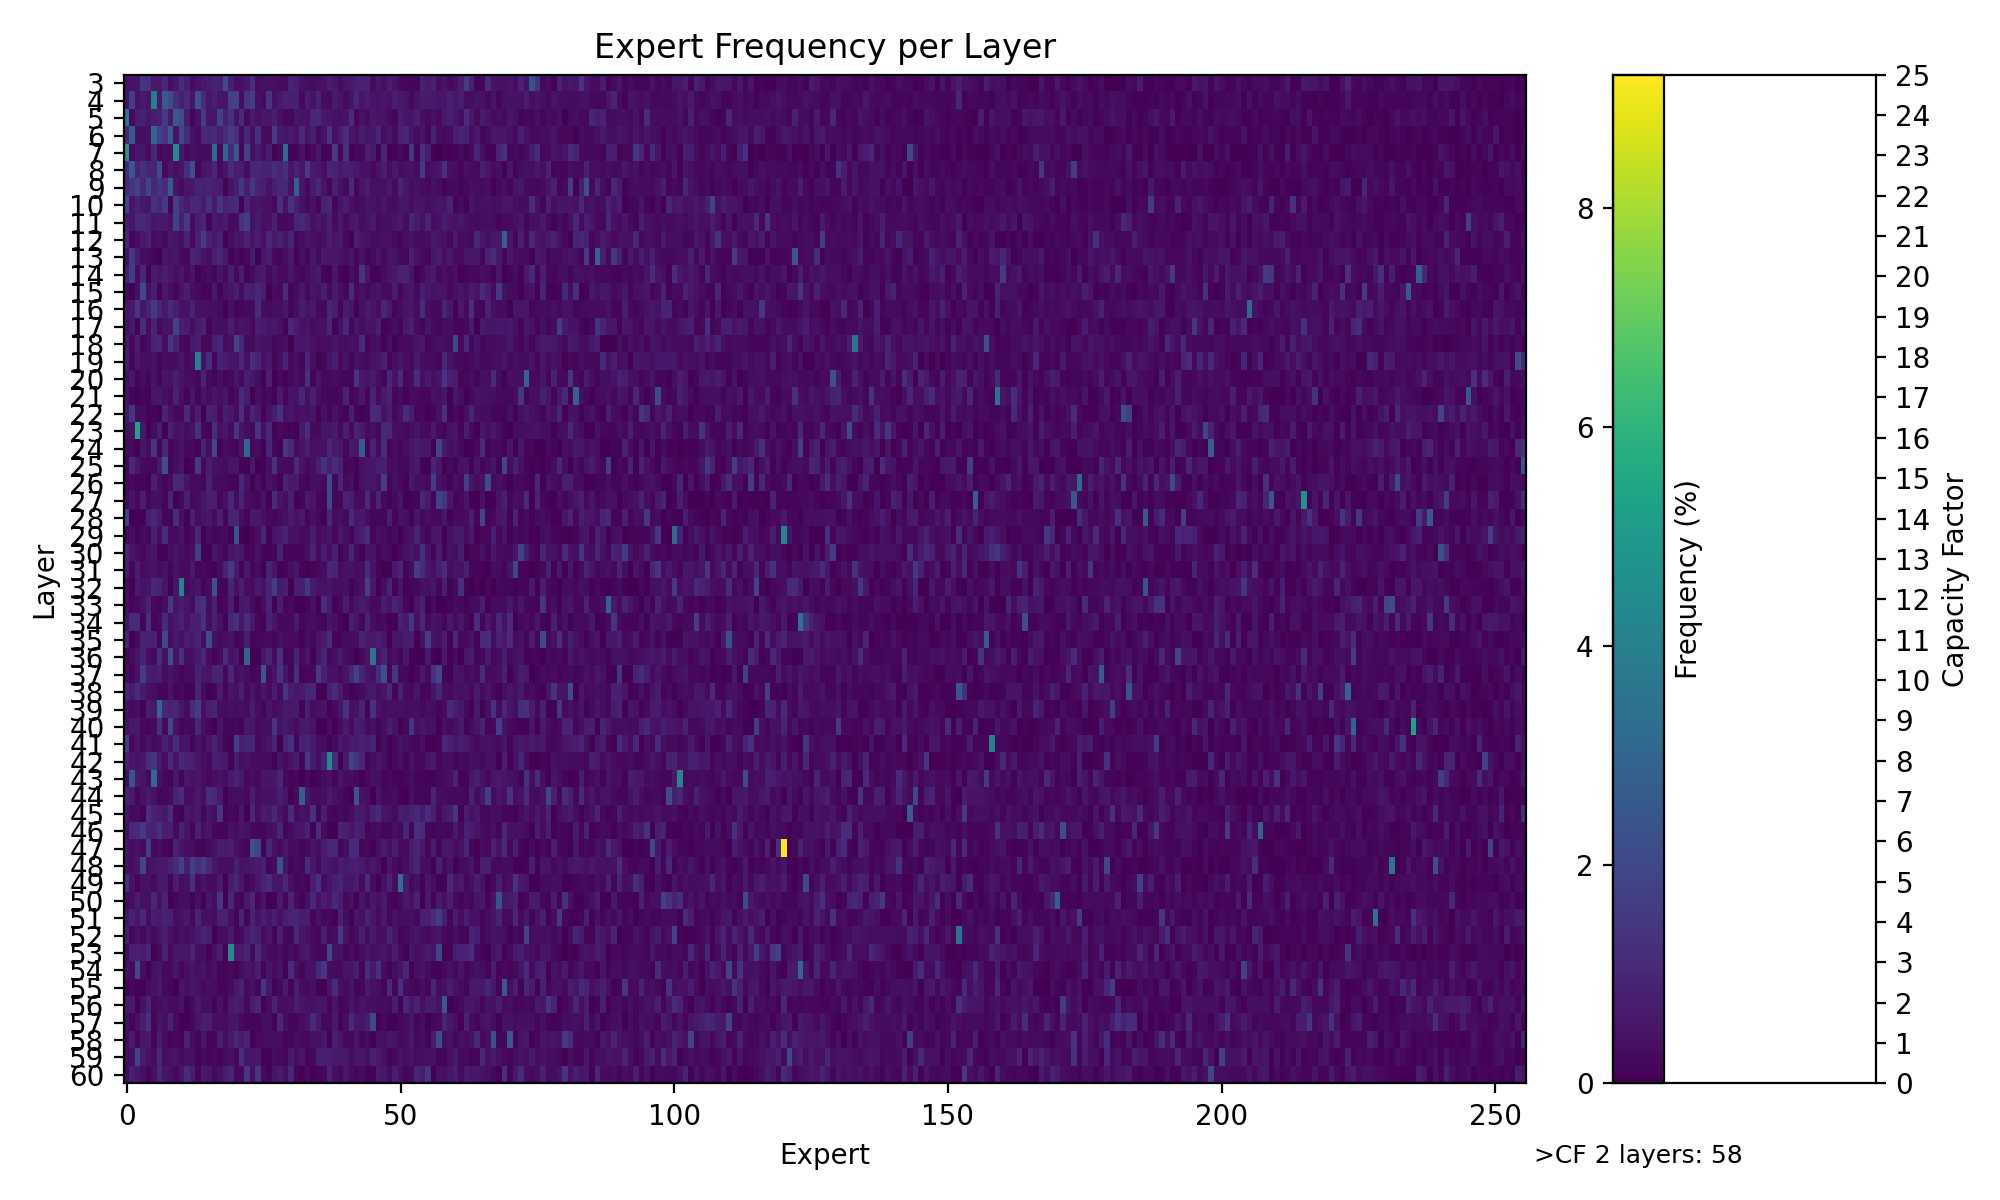

In [15]:

from IPython.display import Image, display

REQUEST_ID = '0'  # set to the problem/request id you want
out_png_single = OUT_DIR / f'expert_freq_layers_3-60_request_{REQUEST_ID}.png'
run([
    str(PY), 'plots/plot_expert_freq.py',
    '--trace', str(TRACE),
    '--out', str(out_png_single),
    '--layers', '3-60',
    '--request-id', REQUEST_ID
])
print(out_png_single)

display(Image(filename=str(out_png_single)))


## Sorted Expert Frequencies (Across Layers)
Flatten expert frequencies across layers, sort, and compare datasets.

/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq_sorted.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --trace /Users/jrock/repos/moe-balancing/data/math-ai_aime25/processed/trace_no_origin_rows.jsonl --label gpqa --label aime25 --layers 3-60 --out /Users/jrock/repos/moe-balancing/results/expert_freq_sorted_gpqa_vs_aime.png
summary: top-32 combined frequency per layer for gpqa
  layer 3: 33.7086%
  layer 4: 36.4943%
  layer 5: 33.2345%
  layer 6: 36.8926%
  layer 7: 49.6795%
  layer 8: 33.6004%
  layer 9: 33.7979%
  layer 10: 29.3217%
  layer 11: 25.8133%
  layer 12: 24.9040%
  layer 13: 26.4681%
  layer 14: 27.6693%
  layer 15: 29.9030%
  layer 16: 26.9051%
  layer 17: 26.5685%
  layer 18: 28.0869%
  layer 19: 26.1046%
  layer 20: 27.9585%
  layer 21: 29.6007%
  layer 22: 28.4666%
  layer 23: 35.1646%
  layer 24: 33.6896%
  layer 25: 32.1480%
  layer 26: 30.8216%
  layer 27: 32.6687%
  layer 28: 33.0123%
  

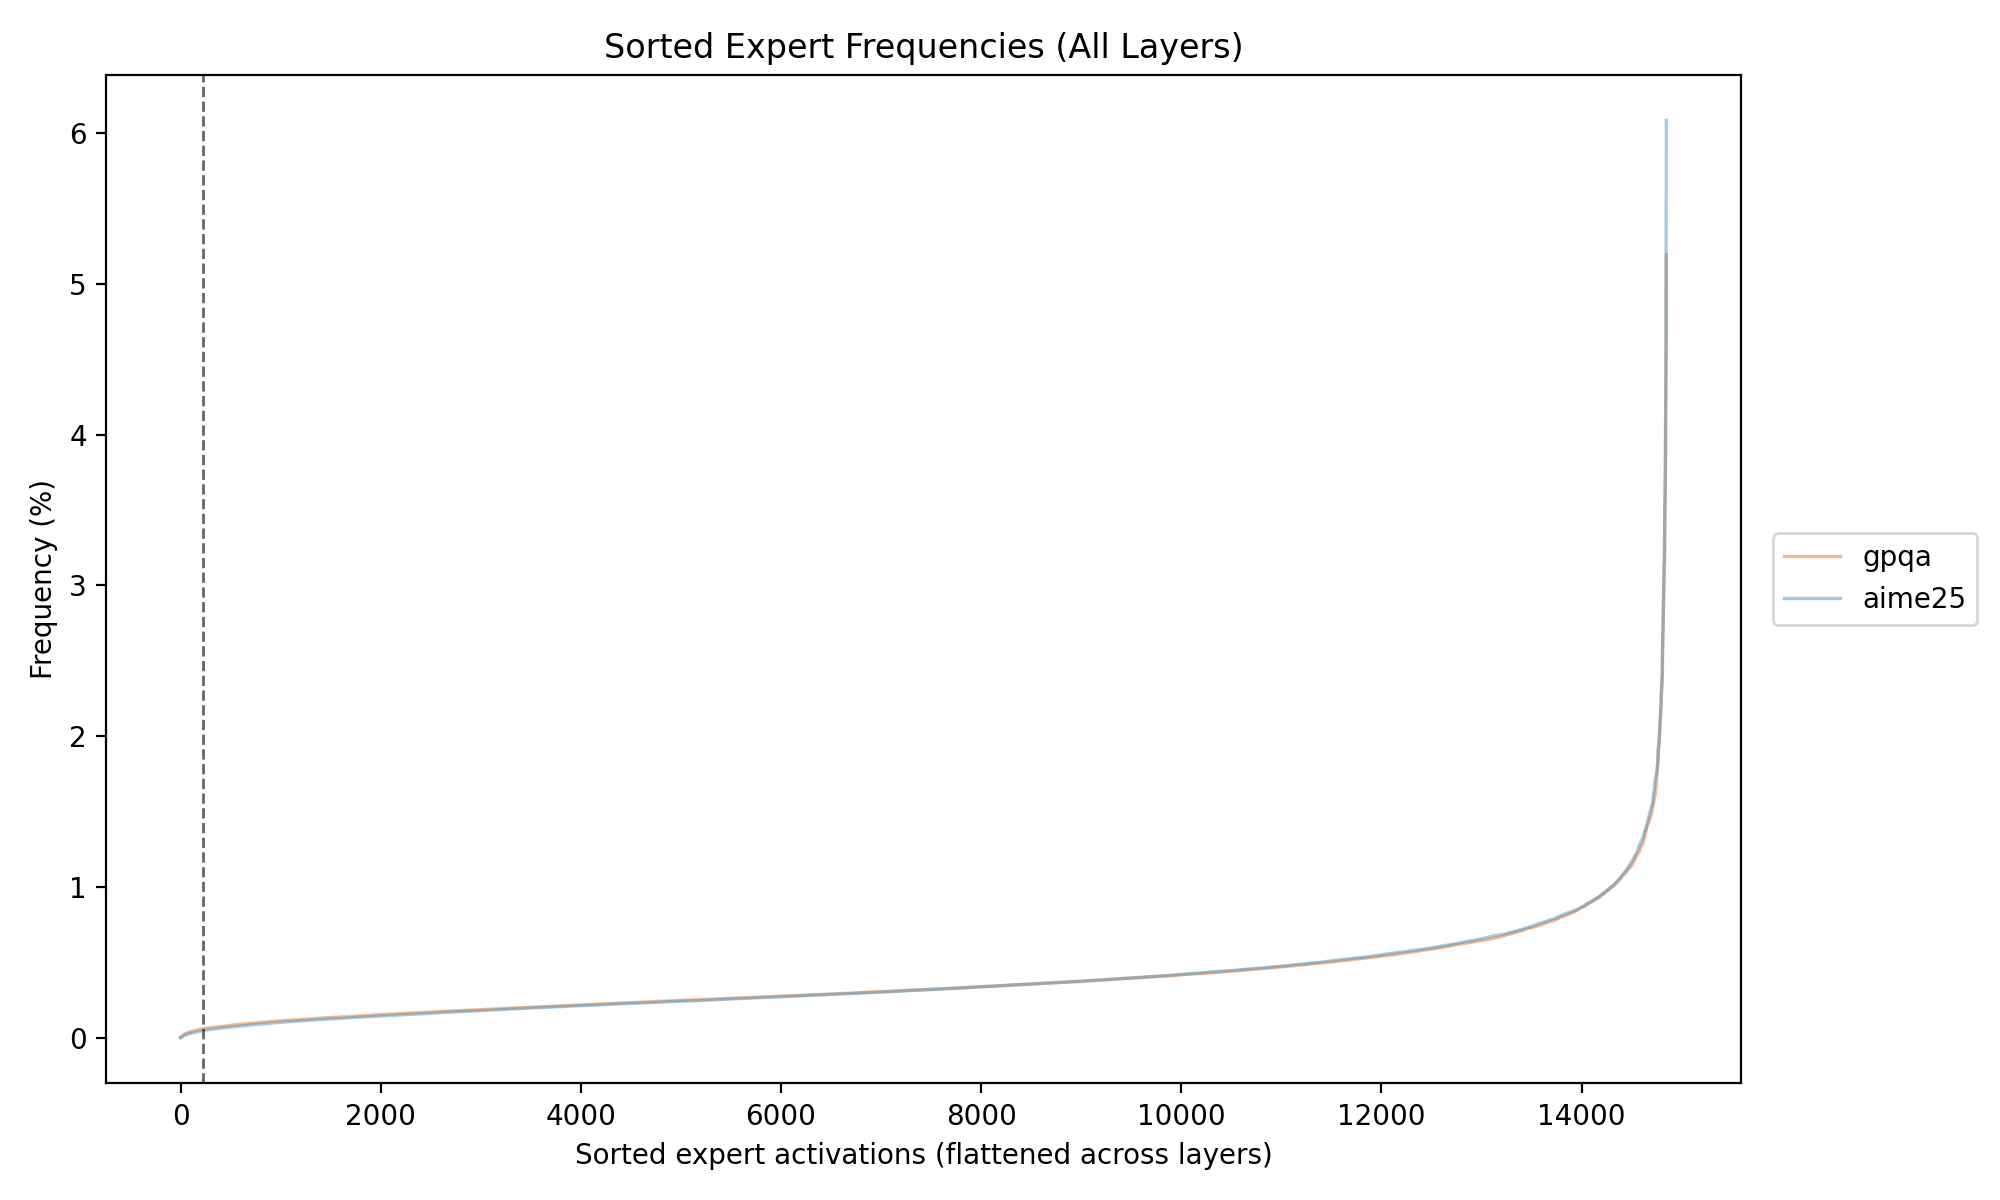

In [28]:

from IPython.display import Image, display

trace_gpqa = REPO / 'data' / 'Idavidrein_gpqa' / 'processed' / 'trace_no_origin_rows.jsonl'
trace_aime = REPO / 'data' / 'math-ai_aime25' / 'processed' / 'trace_no_origin_rows.jsonl'

out_png_sorted = REPO / 'results' / 'expert_freq_sorted_gpqa_vs_aime.png'
run([
    str(PY), 'plots/plot_expert_freq_sorted.py',
    '--trace', str(trace_gpqa),
    '--trace', str(trace_aime),
    '--label', 'gpqa',
    '--label', 'aime25',
    '--layers', '3-60',
    '--out', str(out_png_sorted)
])
print(out_png_sorted)

display(Image(filename=str(out_png_sorted)))


## Sorted Expert Frequencies (With Replication)
Apply greedy replication and plot sorted frequencies.

In [ ]:

from IPython.display import Image, display

REPL_SLOTS = 112  # number of replication slots (e.g., 384 total -> 128 extra = 16 shared expert = 112 extra)

out_png_sorted_rep = OUT_DIR / f'expert_freq_sorted_aime25_repl_{REPL_SLOTS}.png'
run([
    str(PY), 'plots/plot_expert_freq_sorted.py',
    '--trace', str(TRACE),
    '--label', 'aime25',
    '--layers', '3-60',
    '--replication-slots', str(REPL_SLOTS),
    '--out', str(out_png_sorted_rep)
])
print(out_png_sorted_rep)

display(Image(filename=str(out_png_sorted_rep)))


## Sorted Expert Frequencies (Per Dataset + Layer)
One curve per dataset and layer to compare distributions.

/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq_sorted.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --trace /Users/jrock/repos/moe-balancing/data/math-ai_aime25/processed/trace_no_origin_rows.jsonl --label gpqa --label aime25 --layers 3-60 --series-by-layer --out /Users/jrock/repos/moe-balancing/results/expert_freq_sorted_gpqa_vs_aime_by_layer.png
summary: top-32 combined frequency per layer for gpqa
  layer 3: 33.7086%
  layer 4: 36.4943%
  layer 5: 33.2345%
  layer 6: 36.8926%
  layer 7: 49.6795%
  layer 8: 33.6004%
  layer 9: 33.7979%
  layer 10: 29.3217%
  layer 11: 25.8133%
  layer 12: 24.9040%
  layer 13: 26.4681%
  layer 14: 27.6693%
  layer 15: 29.9030%
  layer 16: 26.9051%
  layer 17: 26.5685%
  layer 18: 28.0869%
  layer 19: 26.1046%
  layer 20: 27.9585%
  layer 21: 29.6007%
  layer 22: 28.4666%
  layer 23: 35.1646%
  layer 24: 33.6896%
  layer 25: 32.1480%
  layer 26: 30.8216%
  layer 27: 32.66

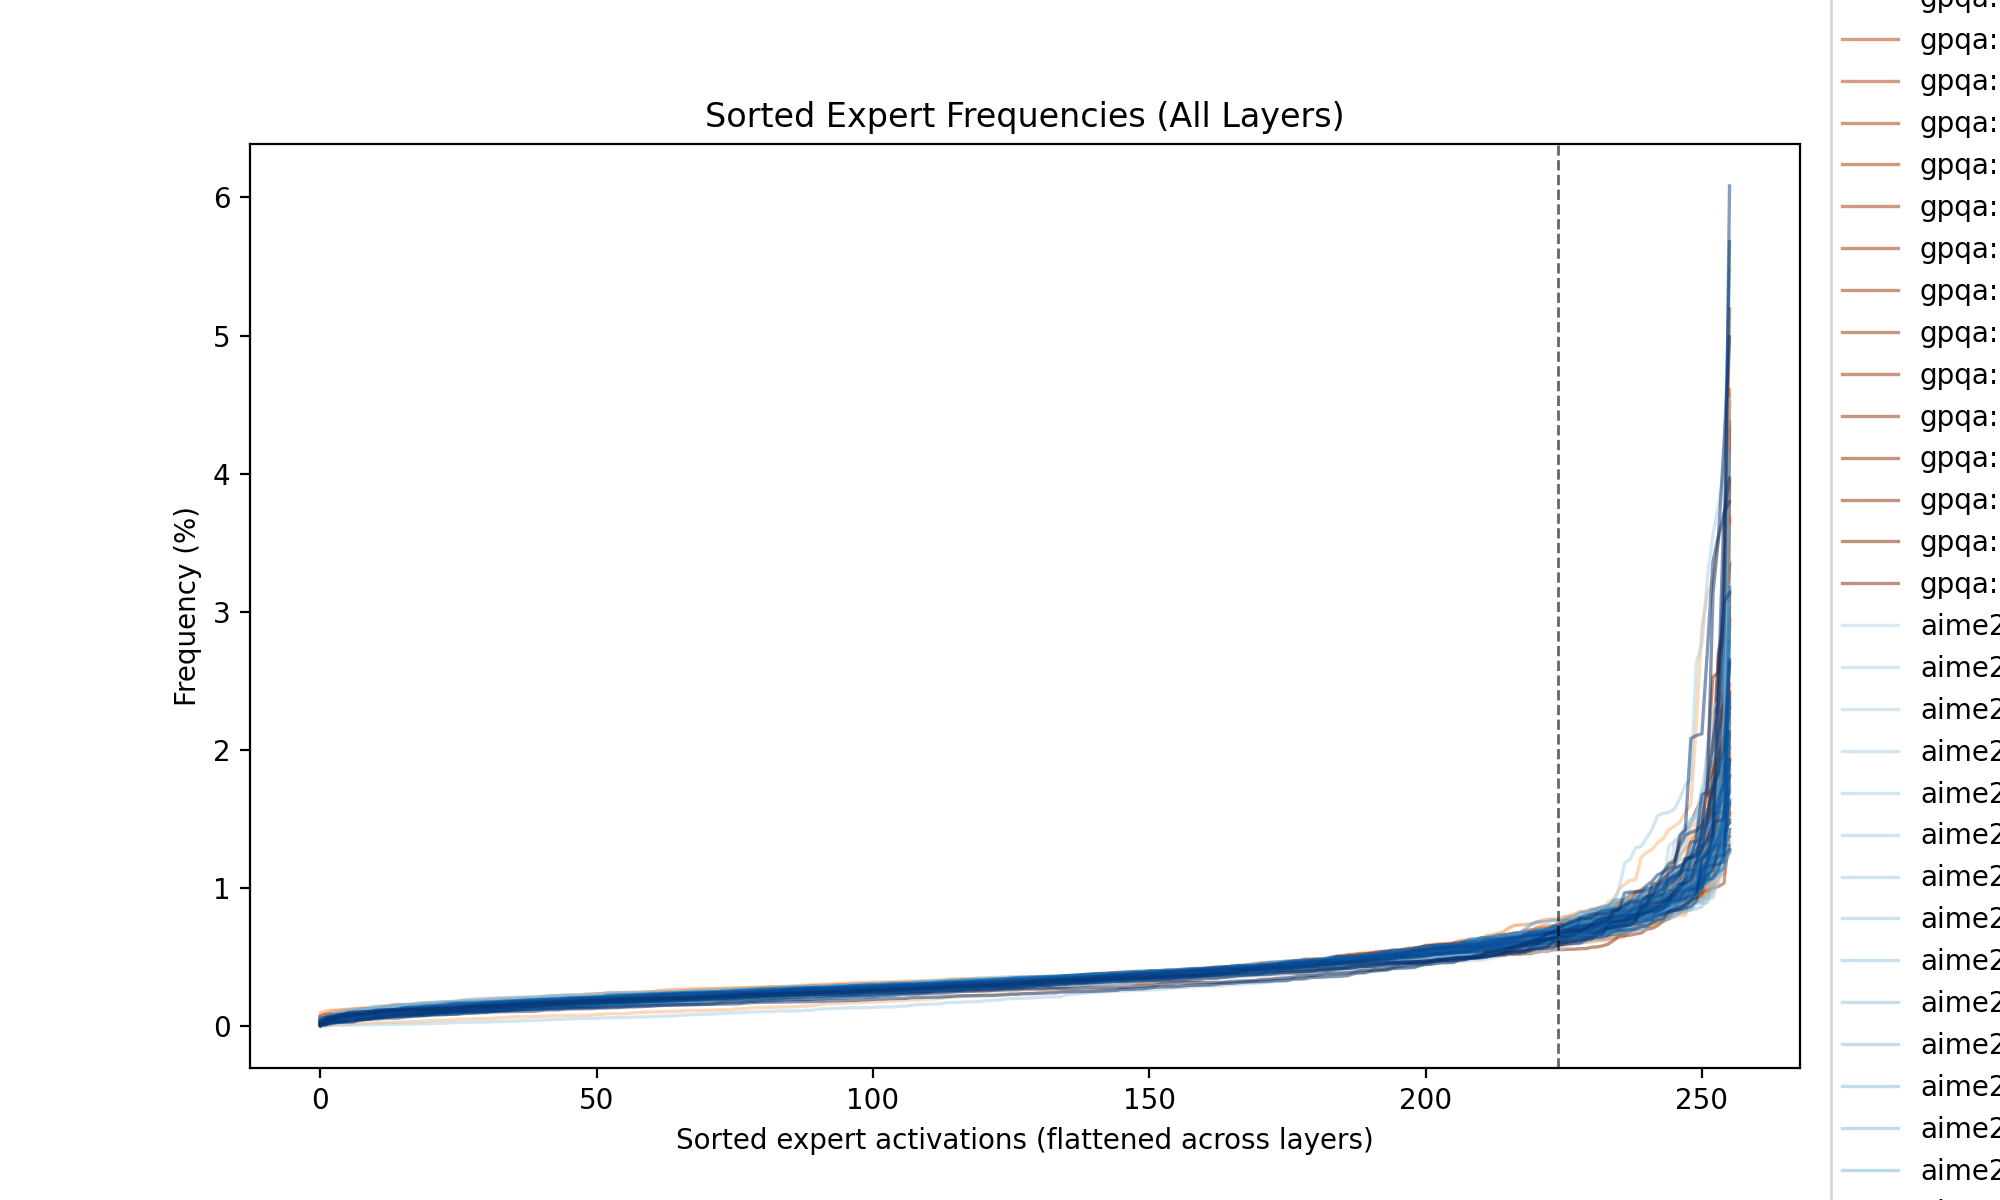

In [30]:

from IPython.display import Image, display

trace_gpqa = REPO / 'data' / 'Idavidrein_gpqa' / 'processed' / 'trace_no_origin_rows.jsonl'
trace_aime = REPO / 'data' / 'math-ai_aime25' / 'processed' / 'trace_no_origin_rows.jsonl'

out_png_sorted_layers = REPO / 'results' / 'expert_freq_sorted_gpqa_vs_aime_by_layer.png'
run([
    str(PY), 'plots/plot_expert_freq_sorted.py',
    '--trace', str(trace_gpqa),
    '--trace', str(trace_aime),
    '--label', 'gpqa',
    '--label', 'aime25',
    '--layers', '3-60',
    '--series-by-layer',
    '--title', 'Sorted Expert Frequencies (Per Dataset + Layer)',
    '--out', str(out_png_sorted_layers)
])
print(out_png_sorted_layers)

display(Image(filename=str(out_png_sorted_layers)))


## Sorted Expert Frequencies (Per Dataset + Layer, With Replication)
Per-layer curves with replication applied.

/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq_sorted.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --trace /Users/jrock/repos/moe-balancing/data/math-ai_aime25/processed/trace_no_origin_rows.jsonl --label gpqa --label aime25 --layers 3-60 --series-by-layer --replication-slots 112 --title Sorted Expert Frequencies (Per Dataset + Layer, With Replication) --out /Users/jrock/repos/moe-balancing/data/math-ai_aime25/processed/expert_freq_sorted_gpqa_vs_aime_by_layer_repl_112.png
summary: top-32 combined frequency per layer for gpqa
  layer 3: 14.0476%
  layer 4: 13.3464%
  layer 5: 12.9500%
  layer 6: 13.3873%
  layer 7: 15.5361%
  layer 8: 13.4357%
  layer 9: 13.6393%
  layer 10: 13.3153%
  layer 11: 12.7255%
  layer 12: 12.7487%
  layer 13: 12.7074%
  layer 14: 12.7160%
  layer 15: 13.2123%
  layer 16: 12.7813%
  layer 17: 12.8518%
  layer 18: 12.7434%
  layer 19: 12.6066%
  layer 20: 13.0799%
  layer 21: 13

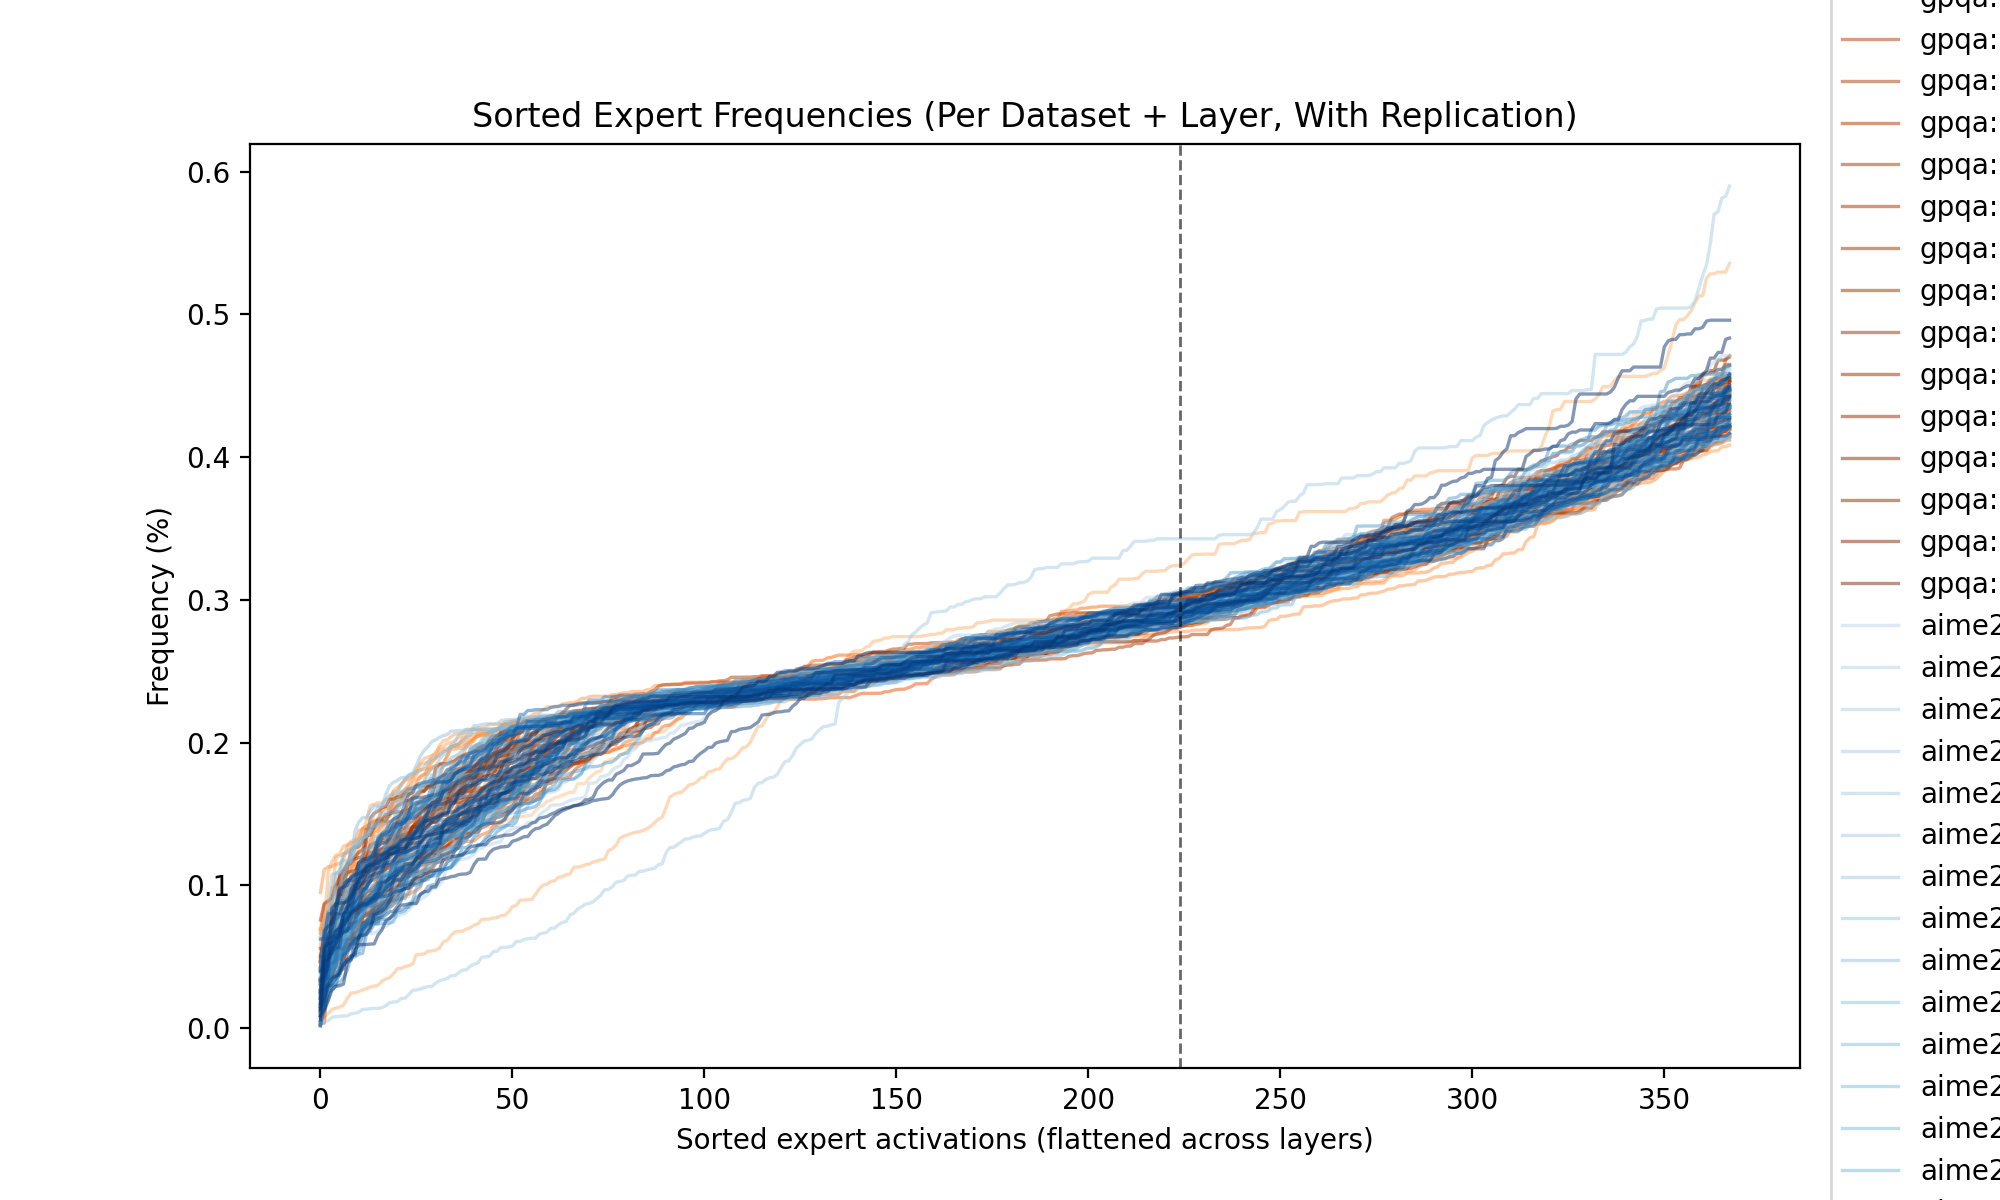

In [34]:

from IPython.display import Image, display

REPL_SLOTS = 112  # number of replication slots (e.g., 384 total -> 128 extra = 16 shared expert = 112 extra)
trace_gpqa = REPO / 'data' / 'Idavidrein_gpqa' / 'processed' / 'trace_no_origin_rows.jsonl'
trace_aime = REPO / 'data' / 'math-ai_aime25' / 'processed' / 'trace_no_origin_rows.jsonl'

out_png_sorted_layers_rep = REPO / 'results' / f'expert_freq_sorted_gpqa_vs_aime_by_layer_repl_{REPL_SLOTS}.png'
run([
    str(PY), 'plots/plot_expert_freq_sorted.py',
    '--trace', str(trace_gpqa),
    '--trace', str(trace_aime),
    '--label', 'gpqa',
    '--label', 'aime25',
    '--layers', '3-60',
    '--series-by-layer',
    '--replication-slots', str(REPL_SLOTS),
    '--title', 'Sorted Expert Frequencies (Per Dataset + Layer, With Replication)',
    '--out', str(out_png_sorted_layers_rep)
])
print(out_png_sorted_layers_rep)

display(Image(filename=str(out_png_sorted_layers_rep)))


## Cumulative Frequency of Ranked Experts (Per Layer, AIME vs GPQA)
CDF plots for both datasets.

/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq_cdf.py --trace /Users/jrock/repos/moe-balancing/data/math-ai_aime25/processed/trace_no_origin_rows.jsonl --layers 3-60 --out /Users/jrock/repos/moe-balancing/data/math-ai_aime25/processed/expert_freq_cdf_layers_3-60.png --dataset-name aime25
/Users/jrock/repos/moe-balancing/plots/plot_expert_freq_cdf.py:194: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.82, 1])

/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_expert_freq_cdf.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --layers 3-60 --out /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/expert_freq_cdf_layers_3-60.png --dataset-name gpqa
/Users/jrock/repos/moe-balancing/plots/plot_expert_freq_cdf.py:194: UserWarning: Tight layout not applied. The bottom and top mar

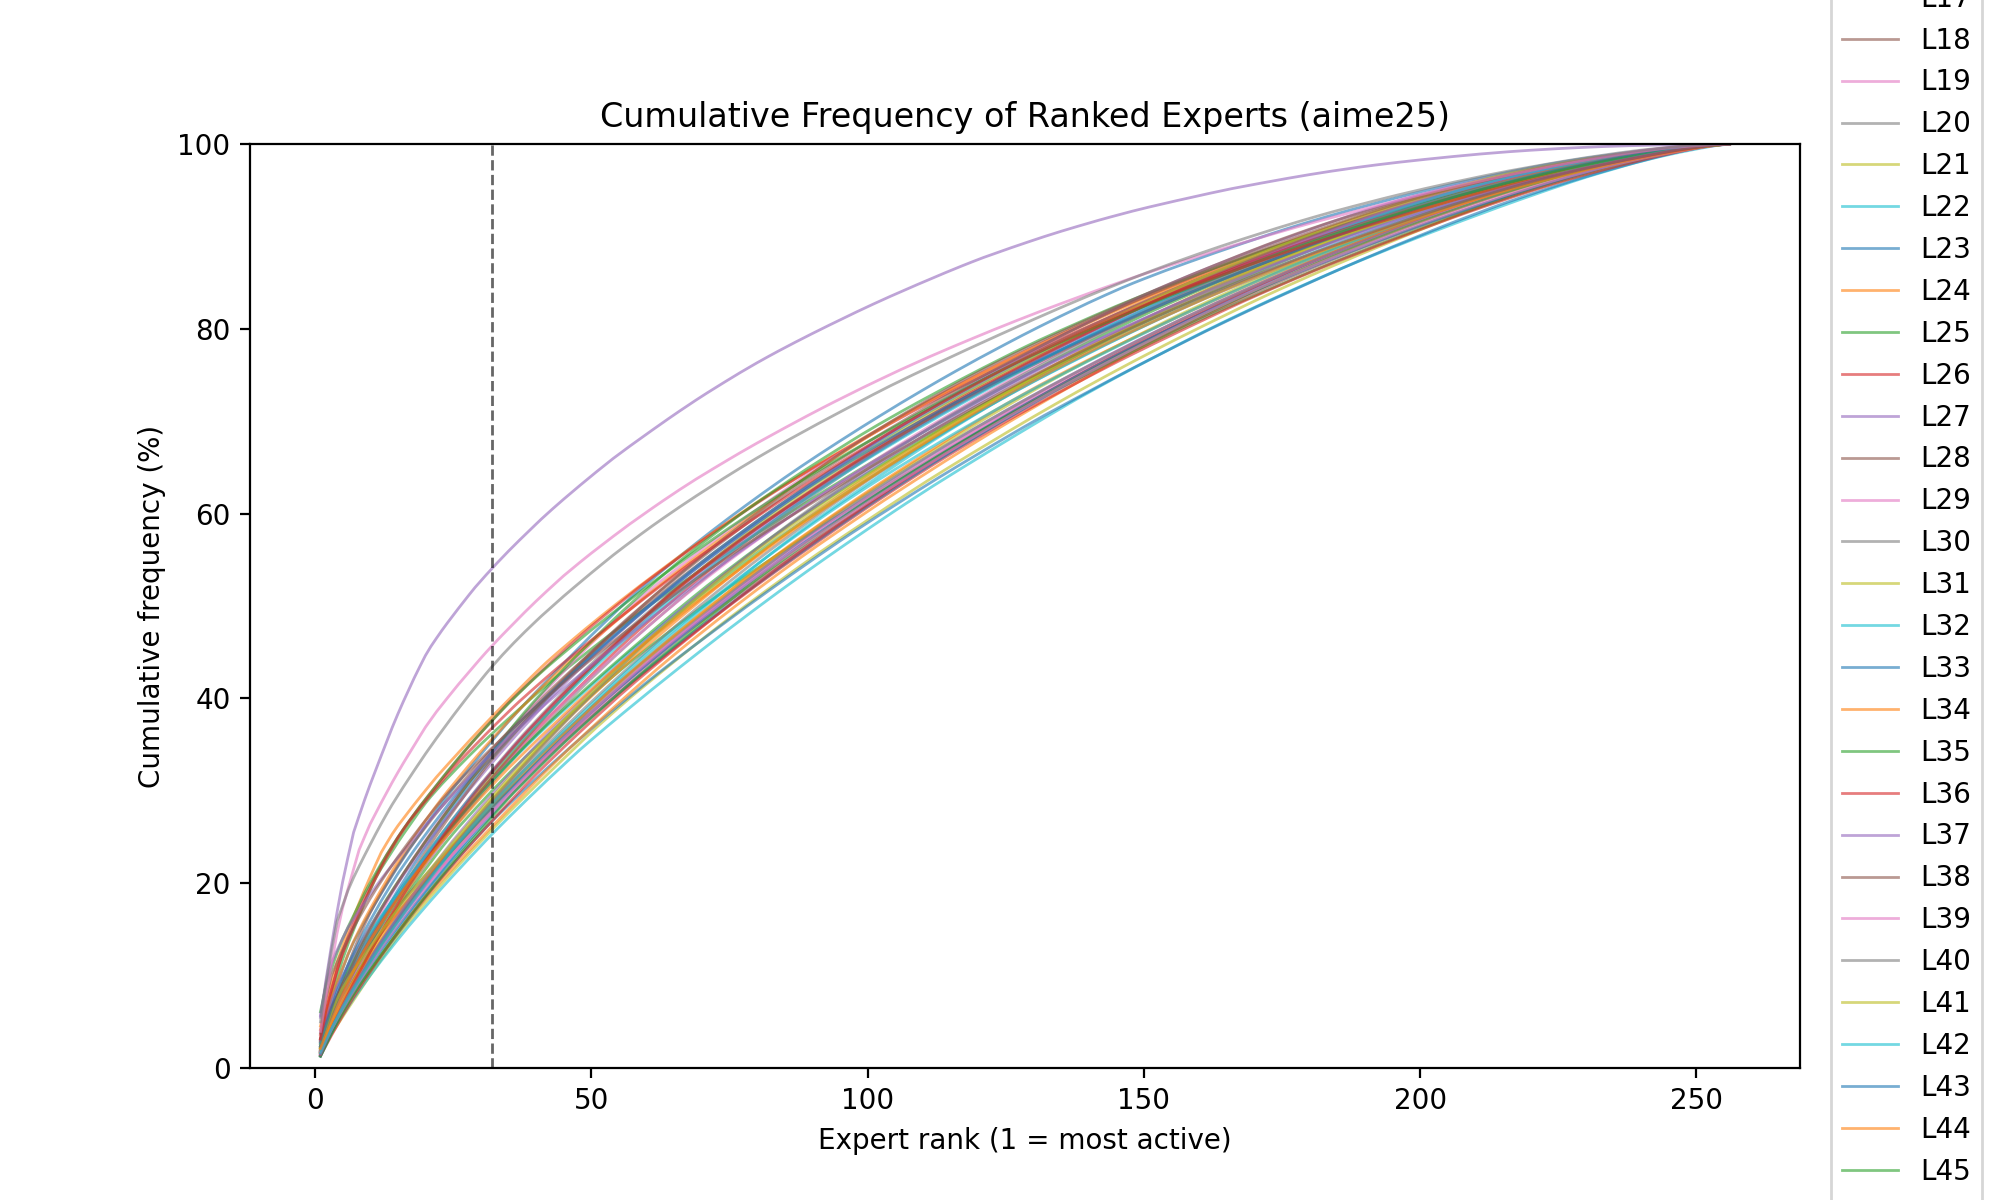

/Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/expert_freq_cdf_layers_3-60.png


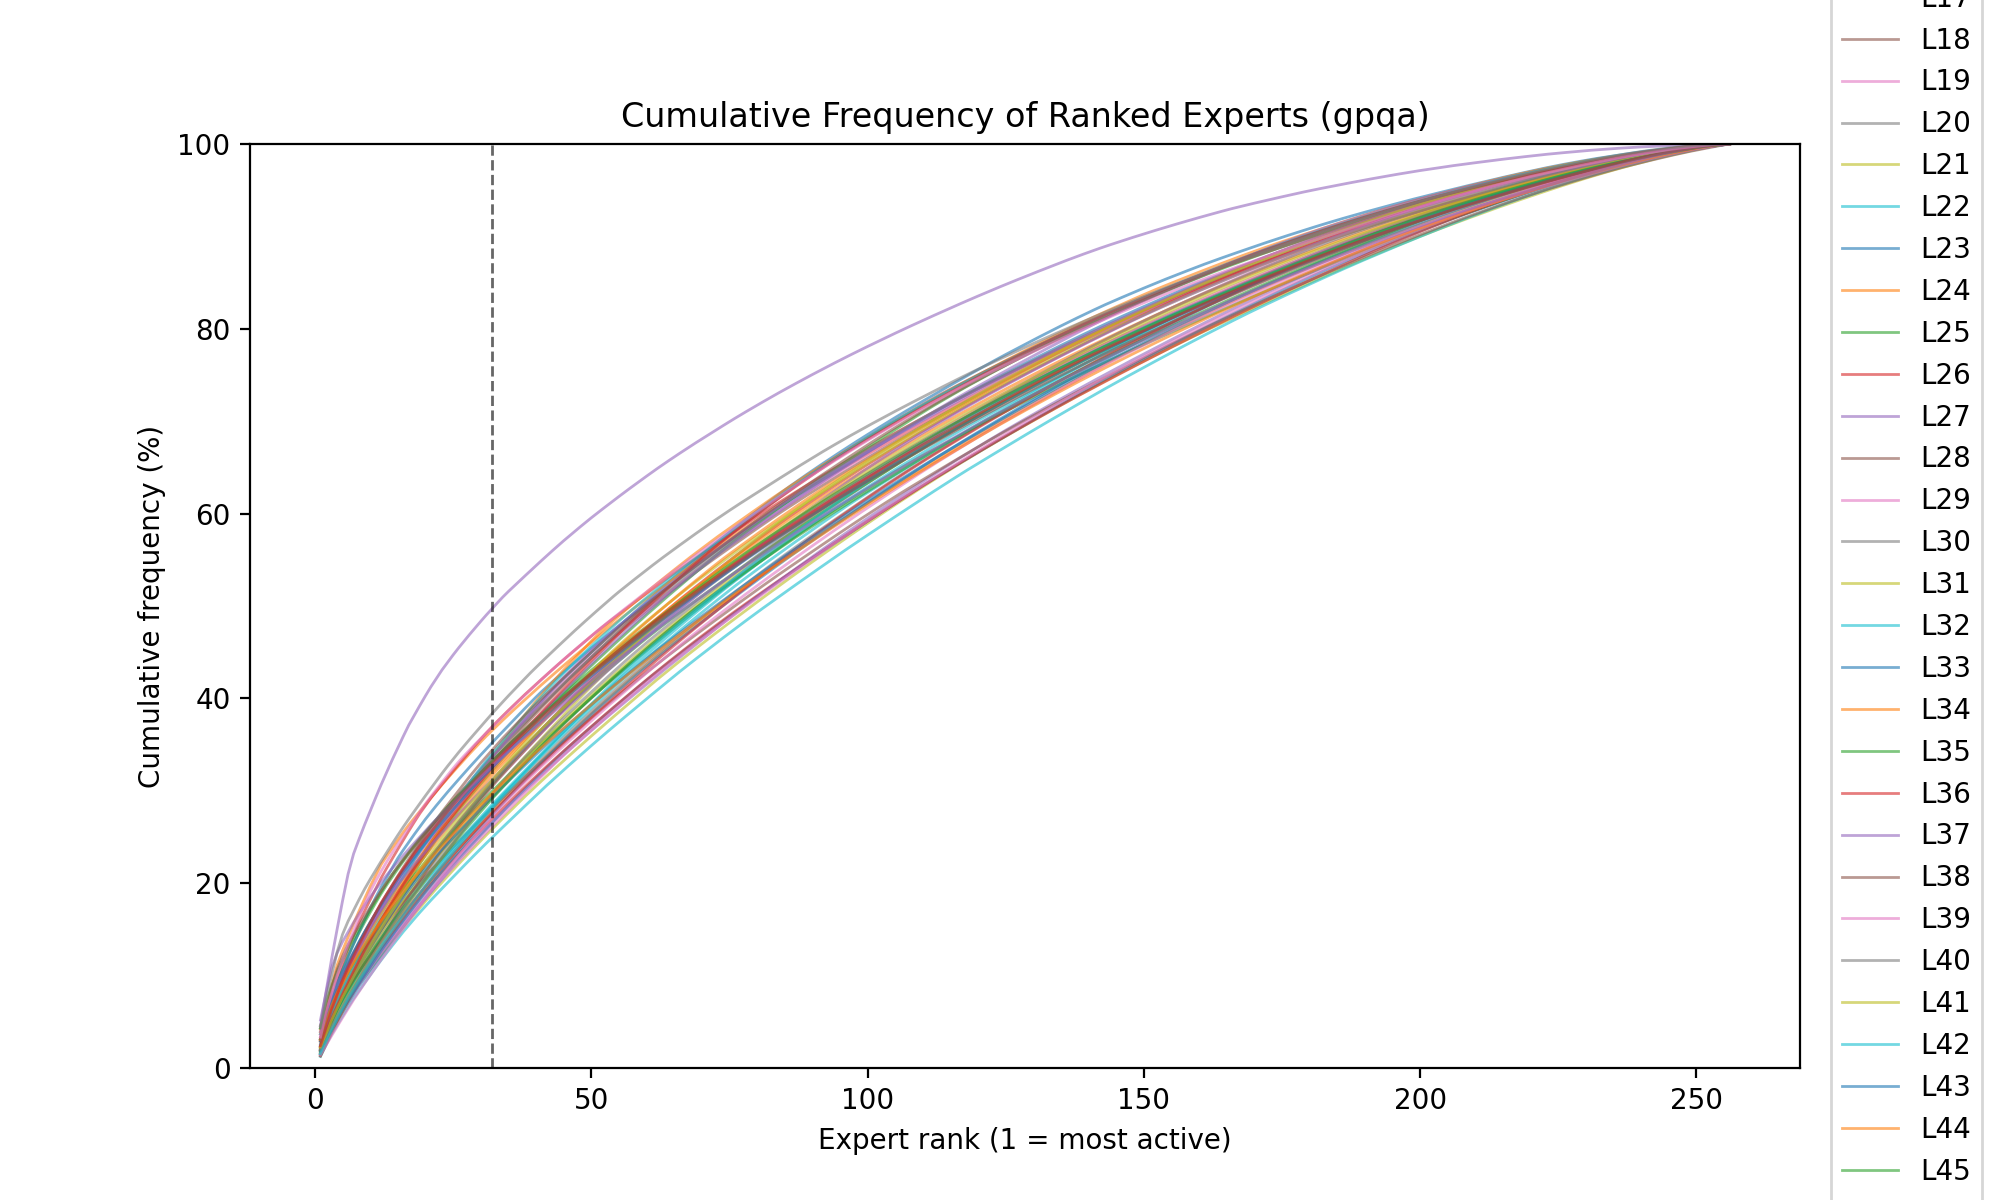

In [29]:

from IPython.display import Image, display

trace_aime = REPO / 'data' / 'math-ai_aime25' / 'processed' / 'trace_no_origin_rows.jsonl'
trace_gpqa = REPO / 'data' / 'Idavidrein_gpqa' / 'processed' / 'trace_no_origin_rows.jsonl'

out_png_aime = REPO / 'data' / 'math-ai_aime25' / 'processed' / 'expert_freq_cdf_layers_3-60.png'
out_png_gpqa = REPO / 'data' / 'Idavidrein_gpqa' / 'processed' / 'expert_freq_cdf_layers_3-60.png'

run([
    str(PY), 'plots/plot_expert_freq_cdf.py',
    '--trace', str(trace_aime),
    '--layers', '3-60',
    '--out', str(out_png_aime),
    '--dataset-name', 'aime25'
])
run([
    str(PY), 'plots/plot_expert_freq_cdf.py',
    '--trace', str(trace_gpqa),
    '--layers', '3-60',
    '--out', str(out_png_gpqa),
    '--dataset-name', 'gpqa'
])

print(out_png_aime)
display(Image(filename=str(out_png_aime)))

print(out_png_gpqa)
display(Image(filename=str(out_png_gpqa)))


## Co-Activation Heatmap (Layer 15)
Generate co-activation CSV and plot.

/Users/jrock/repos/moe-balancing/.venv/bin/python sim/search.py --trace /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/trace_no_origin_rows.jsonl --layer 15 --coact-csv /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/coact_layer0.csv --coact-only
wrote co-activation CSV to /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/coact_layer0.csv

/Users/jrock/repos/moe-balancing/.venv/bin/python plots/plot_coact.py --csv /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/coact_layer0.csv --out /Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/coact_layer0.png
/Users/jrock/repos/moe-balancing/data/Idavidrein_gpqa/processed/coact_layer0.png


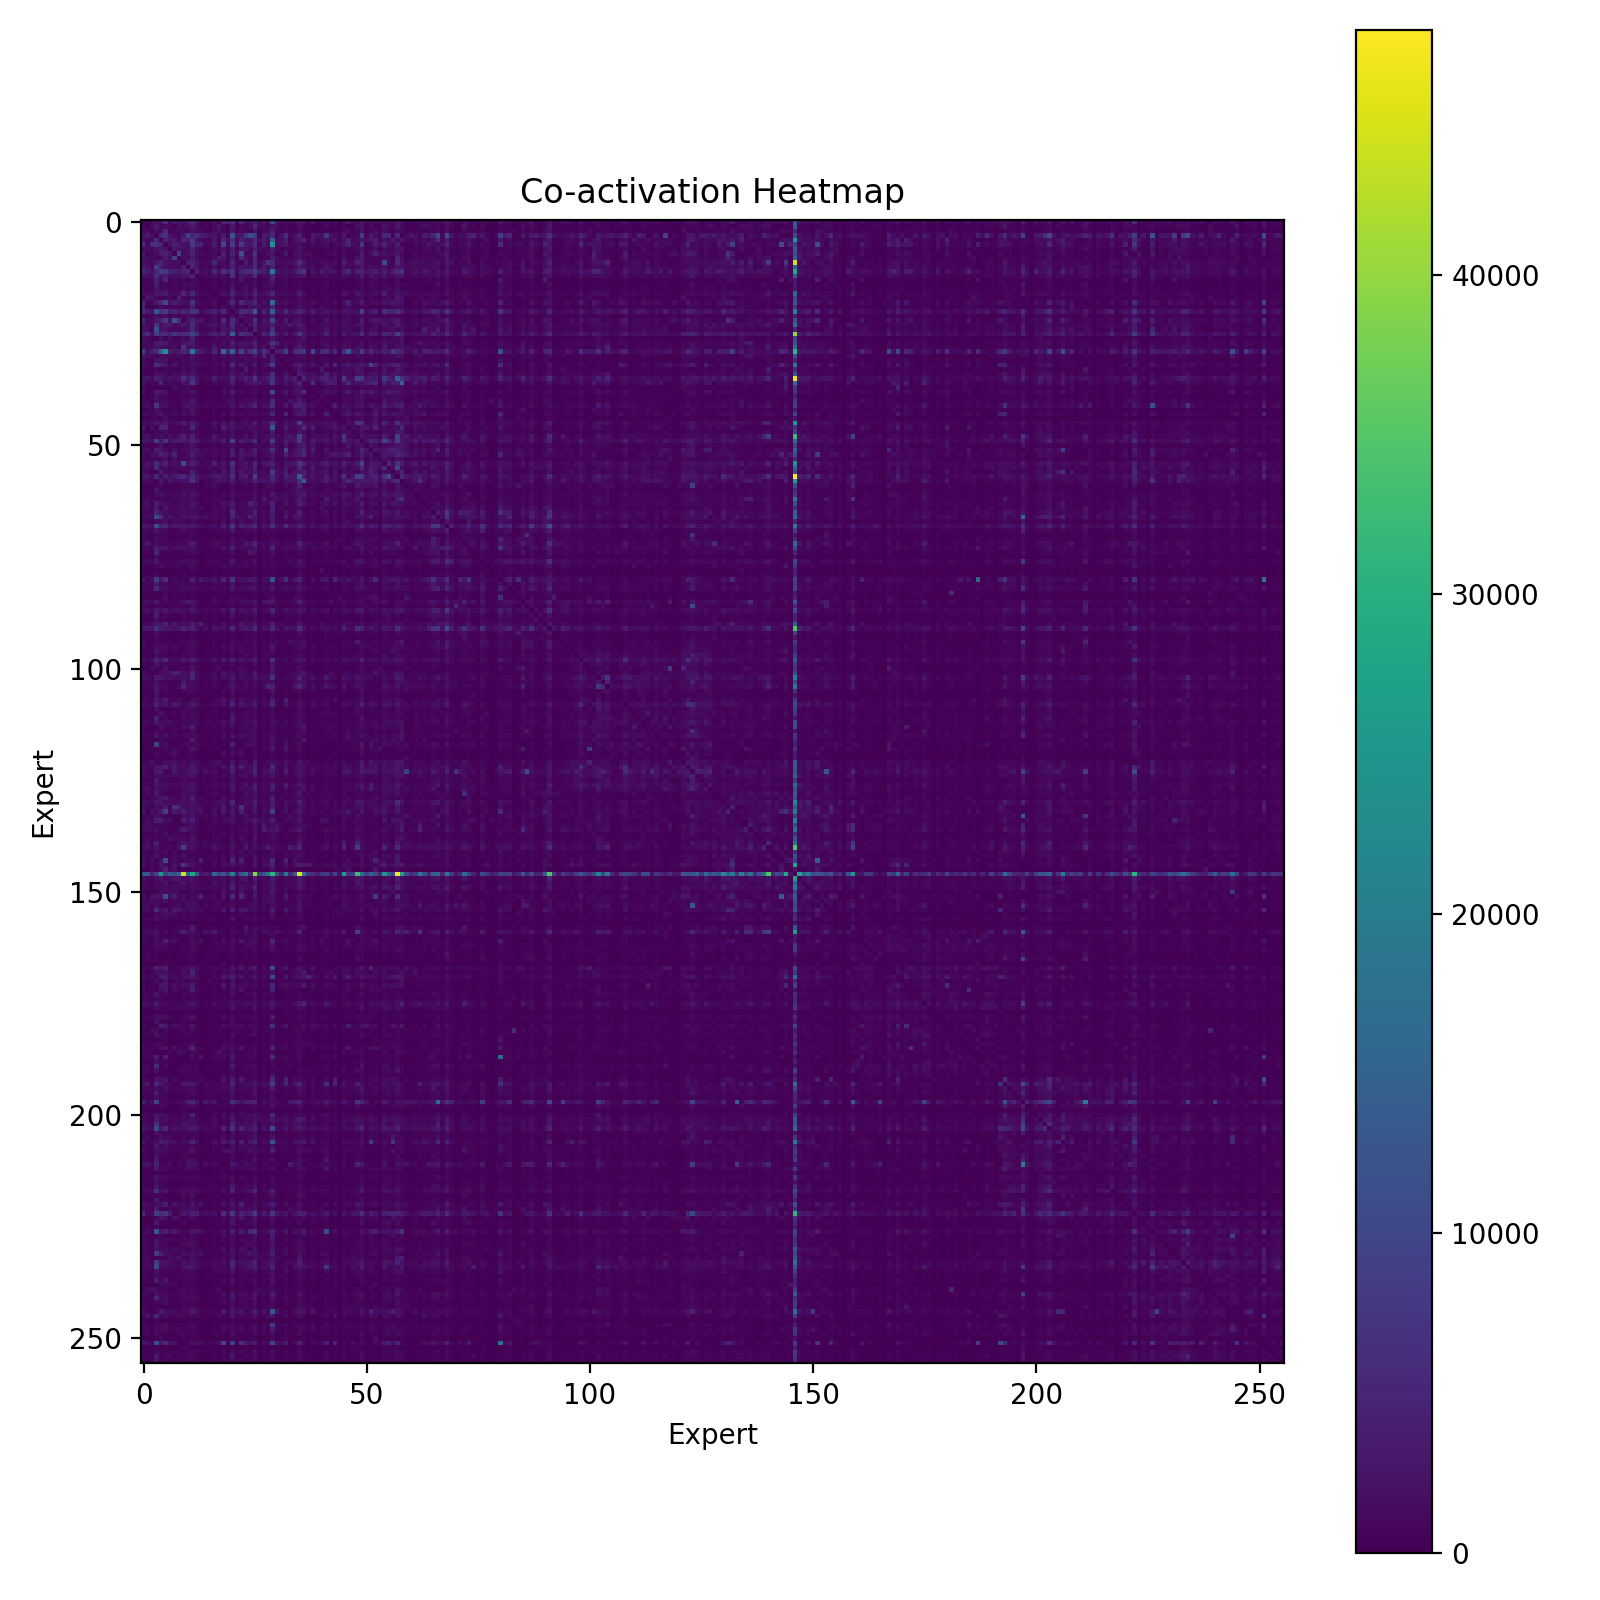

In [ ]:
from IPython.display import Image, display

coact_csv = OUT_DIR / 'coact_layer15.csv'
coact_png = OUT_DIR / 'coact_layer15.png'
run([
    str(PY), 'sim/search.py',
    '--trace', str(TRACE),
    '--layer', '15',
    '--coact-csv', str(coact_csv),
    '--coact-only'
])
run([
    str(PY), 'plots/plot_coact.py',
    '--csv', str(coact_csv),
    '--out', str(coact_png)
])
print(coact_png)
display(Image(filename=str(coact_png)))